In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
import os
path = os.getcwd() +'/data/mnist_train.csv'
data = pd.read_csv(path, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
data.shape   # number of data sets and numbers of pixels or features in the data

(450, 785)

In [129]:
cols=data.shape[1]
print("columns = {}".format(cols))

columns = 785


In [130]:
y=np.array(data.iloc[:,:1])
x=np.array(data.iloc[:,1:cols])

In [131]:
x.shape, y.shape

((450, 784), (450, 1))

In [132]:
np.unique(y)  #finding all unique classes in the output

array([0, 1, 2, 3], dtype=int64)

In [133]:
rows = x.shape[0] #Finding the number of Rows (data samples)
x = np.insert(x, 0, values=np.ones(rows), axis=1) #inserting ones into x

x.shape

(450, 785)

In [134]:
params = x.shape[1] #Finding the number of features
all_theta = np.zeros((4, params)) # here 4 denotes number of labels (0 to 3)
#all_theta = np.matrix(all_theta)
all_theta.shape 

(4, 785)

In [135]:
def sigmoid(z):    #returns values between zero to one
    return 1 / (1 + np.exp(-z))

In [136]:
def computeCost(theta, x, y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    #(-y*log(g(z))) --> when expected output (y)=1
    first = np.multiply(-y, np.log(sigmoid(x * theta.T))) 
    
    #((1-y)*(1-log(g(z)))) --> when expected output (y)=0
    second = np.multiply((1 - y), np.log(1 - sigmoid(x * theta.T)))
    
    cost = np.sum(first - second)
    cost = cost/(2*len(x))
                 
    return cost

In [137]:
cost= computeCost(all_theta, x, y)
print("cost = {}".format(cost))

cost = 1.3862943611198904


In [138]:
learning_rate=1
def gradient(theta, x, y):
    
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    parameters = int(theta.shape[1])
    
    error = sigmoid(x * theta.T) - y
    grad = ((x.T * error) / len(x))
    grad = grad * learning_rate
    return grad

In [139]:
from scipy.optimize import minimize
def one_vs_all(x, y, classes, new_theta):
    params = x.shape[1]
    rows = x.shape[0]
      
    for i in range(0, classes):
        theta = new_theta[i,:]
        y_i = np.array([1 if label == i else 0 for label in y]) 
        y_i = np.reshape(y_i, (rows, 1))
                
        # minimize the objective function  --> Gradient descent
        fmin = minimize(fun=computeCost, x0=theta, args=(x, y_i), method='TNC', jac=gradient)
        all_theta[i,:] = fmin.x
    
    return all_theta

In [140]:
classes = 4
new_theta = one_vs_all(x, y, classes, all_theta)

D:\Courses\Lema Labs ML Workshop x64\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
D:\Courses\Lema Labs ML Workshop x64\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


In [141]:
print(new_theta)

[[ -4.76743575e-03   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -5.00657987e-04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.22486268e-04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  9.04306963e-01   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


In [142]:
computeCost(new_theta, x, y)

30.176903159034008

In [143]:
def predict_all(x, theta): 
   
    # convert to matrices
    x = np.matrix(x)
    theta = np.matrix(theta)
    
    # compute the class probability for each class on each training instance
    h = sigmoid(x * theta.T)
    
    # create array of the index with the maximum probability
    h_argmax = np.argmax(h, axis=1)
    
    return h_argmax

In [144]:
y_pred = predict_all(x, new_theta)
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, y)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ("Training data={} %".format(accuracy * 100))

Training data=100.0 %


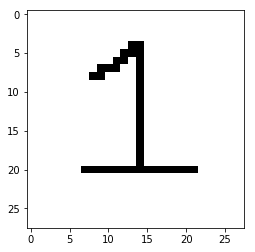

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

def rgb2gray(rgb):
    return np.dot(rgb[:,:,:3], [0.299, 0.587, 0.114])

img = pltimg.imread('data/pic.png')     
gray = rgb2gray(img)

plt.imshow(img)

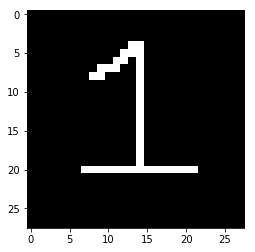

In [146]:
#convert image to array to invert 
grarray = np.asarray(gray)

#converting grayscale to black or white 
#black --> 255
bw = (grarray < (grarray.mean()))*255
#convert array to 28*28 image
bw=np.reshape(bw, (28,28))

plt.imshow(bw,cmap=plt.cm.gray)

In [147]:
bw= np.asarray(bw)
bw= bw.reshape(1,-1)
brows=bw.shape[0]
bw = np.insert(bw, 0, values=np.ones(brows), axis=1)

In [148]:
pred = predict_all(bw, new_theta)
print(pred)

[[1]]


In [149]:
if pred == [0]:
    print ("The number is Zero")
elif pred ==[1]:
    print ("The number is One")
elif pred == [2]:
    print ("The number is Two")
elif pred == [3]:
    print ("The number is Three")
else:
    print ("This is not Magic")

The number is One
